In [1]:
import pandas as pd
import os




In [2]:
data = pd.read_csv("/Users/salonidesai/Desktop/dataforchallenge.csv")
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [3]:
data.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
s = data['created_at'][0]
print(type(s))

<class 'str'>


In [5]:
data[['Date','Time']] = data.created_at.str.split(expand=True) 

In [6]:
data.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,Date,Time
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017-03-13,12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017-03-03,17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56,2017-03-14,4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017-03-26,12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,2017-03-01,4:35:11


In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,Date,Time
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017-03-13,12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017-03-03,17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56,2017-03-14,4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017-03-26,12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,2017-03-01,4:35:11


In [9]:
#look at the data for the month of march - i.e. a 30 day window 
#from here, we will only be considering the sales over a 30 day period that is 1st March 2017 to 30th March 2017
start_date = '2017-03-01'
end_date = '2017-03-30'

mask = (data['Date'] > start_date) & (data['Date'] <= end_date)
data = data.loc[mask]
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,Date,Time
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017-03-13,12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017-03-03,17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56,2017-03-14,4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017-03-26,12:43:37
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01,2017-03-14,15:25:01
...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,2017-03-30,13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,2017-03-16,20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,2017-03-19,5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,2017-03-16,14:51:18


In [10]:
#group the above data by shopid and find total order amount per shop id 
total_order_amount_shops=data.groupby(['shop_id'])['order_amount'].sum().reset_index()
total_order_amount_shops.head(10)

,shop_id,order_amount
0,1,13430
1,2,9494
2,3,13912
3,4,13184
4,5,12496
5,6,21879
6,7,12208
7,8,10824
8,9,13098
9,10,17464


In [11]:
#sum of order amounts per shop for example : shop_id = 2 
data[data.shop_id.isin([2])].sum()

order_id                                                     123939
shop_id                                                         108
user_id                                                       46468
order_amount                                                   9494
total_items                                                     101
payment_method    credit_carddebitdebitcashcashdebitcredit_cardd...
created_at        2017-03-13 13:07:202017-03-17 0:45:532017-03-1...
Time              13:07:200:45:530:21:3118:38:4723:47:457:51:127...
dtype: object

In [12]:
# Now we can find the Metric #1 : "average sales value" in March 2017
#which is equal to the sum of order amounts for each shop / number of shops(100)

total_amt_march_for_all_shops= total_order_amount_shops['order_amount'].sum()
index = total_order_amount_shops.index
number_of_rows = len(index)
print(number_of_rows) # no of rows= number of shop ids = no of shops

ASV_pershop = total_amt_march_for_all_shops/number_of_rows
print(ASV_pershop)

#highest performing shop - shop 42 is the best performing shop in the month of march with $11988416 worth of shoes sold
print(total_order_amount_shops['order_amount'].max())
total_order_amount_shops.iloc[total_order_amount_shops['order_amount'].idxmax()] 

#poorly performing shops in the month of March 2017 can be found by sorting the table on total order amount values

total_order_amount_shops= total_order_amount_shops.sort_values(by ='order_amount' )

#shop 92 has the worst performance followed by shop 32,56,100,.. etc
worst_performance =total_order_amount_shops.head(20)
print(worst_performance)

#shop 42 has the best performance followed by shop 78,89,81,6,59.. etc
best_performance =total_order_amount_shops.tail(20)
best_performance= best_performance.sort_values(by ='order_amount' ,ascending=False )
print(best_performance)




100
156194.86
11988416
    shop_id  order_amount
91       92          6840
31       32          7171
55       56          8073
99      100          8103
1         2          9494
38       39          9514
66       67          9563
47       48          9711
74       75          9984
24       25         10010
33       34         10126
43       44         10224
82       83         10449
84       85         10492
7         8         10824
15       16         10920
73       74         11169
46       47         11455
63       64         11704
30       31         11739
    shop_id  order_amount
41       42      11988416
77       78       2212350
88       89         22736
80       81         22302
5         6         21879
58       59         21360
12       13         20960
70       71         20336
83       84         20196
69       70         19722
18       19         19071
89       90         19046
72       73         18645
28       29         18582
98       99         18330
11       12    

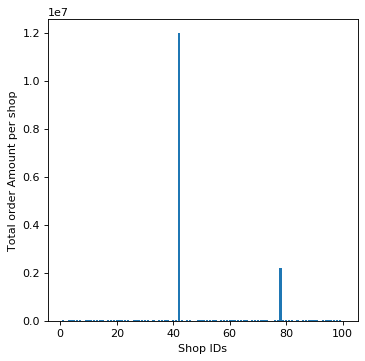

In [13]:
#in the month of march, a shop on average sold $156194.86 worth of shoes 
# this amount when compared with individual shop sales can tell us which shops performed the best in the month of march 
#by selling the maximum amount of shoes

#let's visualize this using matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
plt.bar(total_order_amount_shops['shop_id'], total_order_amount_shops['order_amount'])
plt.ylabel('Total order Amount per shop')
plt.xlabel('Shop IDs')
plt.show()

#in the plot below shop #42 and #78 stand out 

In [14]:
#Metric 2 : amount_per_order (average)
#average order value for a month = sum of all order values/ no of orders in the month of March 2017
data


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,Date,Time
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017-03-13,12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017-03-03,17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56,2017-03-14,4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017-03-26,12:43:37
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01,2017-03-14,15:25:01
...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,2017-03-30,13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,2017-03-16,20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,2017-03-19,5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,2017-03-16,14:51:18


In [15]:
total_order_amount = data['order_amount'].sum()
total_order_amount

15619486

In [16]:
#In March 2017, orders placed were for an average of $3241.9 which is slightly higher than AOV given
amount_per_order = total_order_amount/4818 #(total no of orders placed)
amount_per_order

3241.9024491490245

In [ ]:
#for each user, we can find the % of the amount paid by card and that paid by cash



In [19]:
order_amount_per_user =data.groupby(['user_id','payment_method'])['order_amount'].sum().reset_index()
order_amount_per_user

,user_id,payment_method,order_amount
0,607,credit_card,11968000
1,700,cash,2691
2,700,credit_card,1159
3,700,debit,940
4,701,cash,390
...,...,...,...
893,998,credit_card,1451
894,998,debit,473
895,999,cash,2475
896,999,credit_card,2565


In [37]:
data_sample_credit_card = data[data['payment_method'] == 'credit_card']
data_sample_credit_card

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,Date,Time
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017-03-26,12:43:37
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01,2017-03-14,15:25:01
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26,2017-03-30,21:08:26
10,11,66,848,322,2,credit_card,2017-03-26 23:36:40,2017-03-26,23:36:40
12,13,54,799,266,2,credit_card,2017-03-16 14:15:34,2017-03-16,14:15:34
...,...,...,...,...,...,...,...,...,...
4982,4983,1,906,316,2,credit_card,2017-03-26 15:57:18,2017-03-26,15:57:18
4984,4985,44,966,432,3,credit_card,2017-03-15 20:12:31,2017-03-15,20:12:31
4987,4988,11,826,184,1,credit_card,2017-03-02 9:35:25,2017-03-02,9:35:25
4989,4990,11,843,552,3,credit_card,2017-03-02 15:06:29,2017-03-02,15:06:29


In [39]:
orders_cc =data_sample_credit_card.groupby(['user_id'])['order_amount'].sum().reset_index()
orders_cc

,user_id,order_amount
0,607,11968000
1,700,1159
2,701,1881
3,702,2010
4,703,2060
...,...,...
296,995,1302
297,996,1877
298,997,434
299,998,1451


In [40]:
data_sample_cash = data[data['payment_method'] == 'cash']
data_sample_cash

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,Date,Time
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017-03-13,12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017-03-03,17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56,2017-03-14,4:23:56
7,8,22,761,292,2,cash,2017-03-08 2:05:38,2017-03-08,2:05:38
13,14,100,709,111,1,cash,2017-03-22 2:39:49,2017-03-22,2:39:49
...,...,...,...,...,...,...,...,...,...
4990,4991,24,860,140,1,cash,2017-03-26 0:32:39,2017-03-26,0:32:39
4991,4992,61,707,158,1,cash,2017-03-13 18:56:04,2017-03-13,18:56:04
4994,4995,12,954,201,1,cash,2017-03-22 0:38:11,2017-03-22,0:38:11
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,2017-03-16,20:36:16


In [42]:
orders_cash =data_sample_cash.groupby(['user_id'])['order_amount'].sum().reset_index()
orders_cash

,user_id,order_amount
0,700,2691
1,701,390
2,702,1088
3,703,2362
4,704,1846
...,...,...
292,995,2067
293,996,1478
294,997,26127
295,998,696


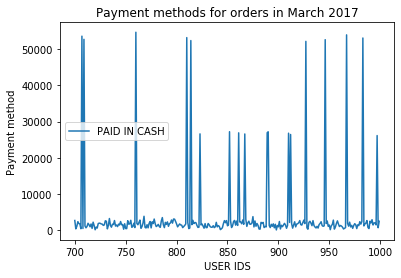

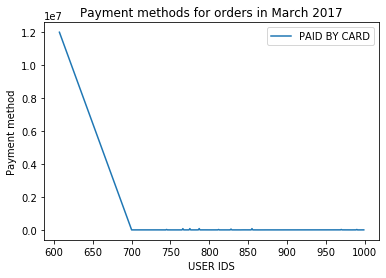

In [52]:
#  cash orders
x1 = orders_cash['user_id']
y1 = orders_cash['order_amount']
plt.plot(x1, y1, label = "PAID IN CASH")
plt.xlabel('USER IDS')
plt.ylabel('Payment method')

plt.title('Payment methods for orders in March 2017')
plt.legend()
plt.show()

# credit card orders
x2 = orders_cc['user_id']
y2 = orders_cc['order_amount']
plt.plot(x2, y2, label = "PAID BY CARD")
plt.xlabel('USER IDS')
plt.ylabel('Payment method')

plt.title('Payment methods for orders in March 2017')
plt.legend()
plt.show()